# Testing Assumptions in model with Dowhy: A simple example
This is a quick introduction to how we can test if our assumed graph is correct and the assumptions match with the dataset.
We do so by checking the conditional independences in the graph and see if they hold true for the data as well. Currently we are using partial correlation to do that. 

First, let us load all required packages.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import os, sys
sys.path.append(os.path.abspath("../../../"))
import dowhy
from dowhy import CausalModel
import dowhy.datasets 

## Step 1: Load dataset

In [3]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000, 
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)

df = pd.read_csv('test_data.csv')  #Insert dataset here
df.head()

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0.428479,1.0,0.608489,-0.518131,-0.682707,-0.563548,-0.017224,0,True,5.384238
1,-0.904170,1.0,0.385278,-0.934957,-1.003160,0.664438,-0.481610,2,False,3.287245
2,0.457611,1.0,0.674786,0.488935,0.432681,0.861960,0.259456,3,True,26.989301
3,0.304734,0.0,0.569865,-1.661278,0.719783,1.217760,-1.141764,3,False,10.631175
4,0.312579,0.0,0.713700,0.465390,-0.579194,-0.845035,-0.915098,3,True,11.540869


Note that we are using a pandas dataframe to load the data. At present, DoWhy only supports pandas dataframe as input.

## Step 2: Input causal graph

We now input a causal graph. You can do that in the GML graph format (recommended), DOT format or the output from daggity -
To create the causal graph for your dataset, you can use a tool like [DAGitty](http://dagitty.net/dags.html#) that provides a GUI to construct the graph. You can export the graph string that it generates.

In [4]:
graph_string = """dag {
        W0 [pos="-2.200,-1.520"]
        W1 [pos="-1.457,-1.533"]
        W2 [pos="-0.763,-1.547"]
        W3 [pos="1.041,-1.587"]
        W4 [pos="1.510,-1.560"]
        X0 [pos="1.222,-0.625"]
        Z0 [pos="0.390,-1.601"]
        Z1 [pos="-0.176,-1.540"]
        v0 [pos="-0.219,-0.881"]
        y [pos="-0.144,-0.296"]
        W0 -> v0
        W0 -> y
        W1 -> v0
        W1 -> y
        W2 -> v0
        W2 -> y
        W3 -> v0
        W3 -> y
        W4 -> v0
        W4 -> y
        X0 -> y
        Z0 -> v0
        Z1 -> v0
        v0 -> y
        }"""

## Step 3: Create Causal Model

In [5]:
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=graph_string
        )

In [6]:
model.view_model()

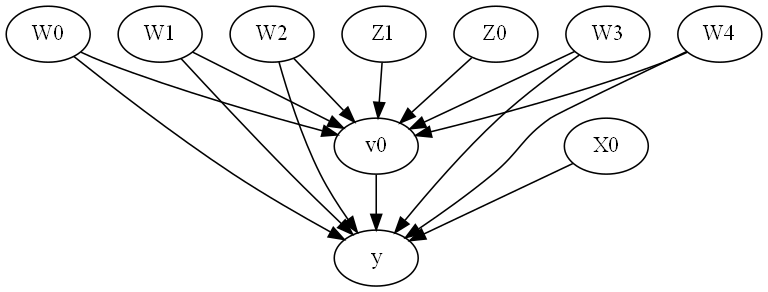

In [7]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

## Step 4: Testing for Conditional Independence
We can check if the assumptions of the graph hold true for the data using model.refute_graph(k, method_name) 
We are testing X ⫫ Y | Z where X and Y are singular sets and Z can have k number of variables. 
Currently we are using "partial_correlation" method by default
The function returns two lists - 
- true_implications : The list of independences from the graph which were true for the dataset
- false_implications: The list of independences from the graph which were false for the dataset

In [8]:
true_implications, false_implications = model.refute_graph( k = 1,method_name = "partial_correlation") #Change k parameter to test conditional independence given different number of variables 

For the input graph following are the conditional independences: 
Z0  and  W0  are CI given  ('W2',)
Z0  and  W0  are CI given  ('W4',)
Z0  and  W0  are CI given  ('W1',)
Z0  and  W0  are CI given  ('X0',)
Z0  and  W0  are CI given  ('W3',)
Z0  and  W0  are CI given  ('Z1',)
Z0  and  W2  are CI given  ('W4',)
Z0  and  W2  are CI given  ('W1',)
Z0  and  W2  are CI given  ('X0',)
Z0  and  W2  are CI given  ('W3',)
Z0  and  W2  are CI given  ('Z1',)
Z0  and  W2  are CI given  ('W0',)
Z0  and  W4  are CI given  ('W1',)
Z0  and  W4  are CI given  ('X0',)
Z0  and  W4  are CI given  ('W3',)
Z0  and  W4  are CI given  ('Z1',)
Z0  and  W4  are CI given  ('W0',)
Z0  and  W4  are CI given  ('W2',)
Z0  and  W1  are CI given  ('X0',)
Z0  and  W1  are CI given  ('W3',)
Z0  and  W1  are CI given  ('Z1',)
Z0  and  W1  are CI given  ('W0',)
Z0  and  W1  are CI given  ('W2',)
Z0  and  W1  are CI given  ('W4',)
Z0  and  X0  are CI given  ('W3',)
Z0  and  X0  are CI given  ('Z1',)
Z0  and  X0  are CI give

In [9]:
print(true_implications)

[['Z0', 'W0', ('W2',)], ['Z0', 'W0', ('W4',)], ['Z0', 'W0', ('W1',)], ['Z0', 'W0', ('X0',)], ['Z0', 'W0', ('W3',)], ['Z0', 'W0', ('Z1',)], ['Z0', 'W2', ('W4',)], ['Z0', 'W2', ('W1',)], ['Z0', 'W2', ('X0',)], ['Z0', 'W2', ('W3',)], ['Z0', 'W2', ('Z1',)], ['Z0', 'W2', ('W0',)], ['Z0', 'W4', ('W1',)], ['Z0', 'W4', ('X0',)], ['Z0', 'W4', ('W3',)], ['Z0', 'W4', ('Z1',)], ['Z0', 'W4', ('W0',)], ['Z0', 'W4', ('W2',)], ['Z0', 'W1', ('X0',)], ['Z0', 'W1', ('W3',)], ['Z0', 'W1', ('Z1',)], ['Z0', 'W1', ('W0',)], ['Z0', 'W1', ('W2',)], ['Z0', 'W1', ('W4',)], ['Z0', 'X0', ('W3',)], ['Z0', 'X0', ('Z1',)], ['Z0', 'X0', ('v0',)], ['Z0', 'X0', ('W0',)], ['Z0', 'X0', ('W2',)], ['Z0', 'X0', ('W4',)], ['Z0', 'X0', ('W1',)], ['Z0', 'W3', ('Z1',)], ['Z0', 'W3', ('W0',)], ['Z0', 'W3', ('W2',)], ['Z0', 'W3', ('W4',)], ['Z0', 'W3', ('W1',)], ['Z0', 'W3', ('X0',)], ['Z0', 'Z1', ('W0',)], ['Z0', 'Z1', ('W2',)], ['Z0', 'Z1', ('W4',)], ['Z0', 'Z1', ('W1',)], ['Z0', 'Z1', ('X0',)], ['Z0', 'Z1', ('W3',)], ['v0', 'X0

In [10]:
print(false_implications)

[]


## Testing with a wrong graph input

In [11]:
graph_string = """dag {
        W0 [pos="-2.200,-1.520"]
        W1 [pos="-1.457,-1.533"]
        W2 [pos="-0.763,-1.547"]
        W3 [pos="1.041,-1.587"]
        W4 [pos="1.510,-1.560"]
        X0 [pos="1.222,-0.625"]
        Z0 [pos="0.390,-1.601"]
        Z1 [pos="-0.176,-1.540"]
        v0 [pos="-0.219,-0.881"]
        y [pos="-0.144,-0.296"]
        W0 -> v0
        W0 -> y
        W1 -> v0
        W1 -> y
        W2 -> v0
        W2 -> y
        W3 -> v0
        W3 -> y
        W4 -> v0
        X0 -> Z0
        Z0 -> Z1
        }"""

In [12]:
model = CausalModel(
            data=df,
            treatment=data["treatment_name"],
            outcome=data["outcome_name"],
            graph=graph_string,
            proceed_when_unidentifiable=True,
            test_significance=None
        )

In [13]:
model.view_model()

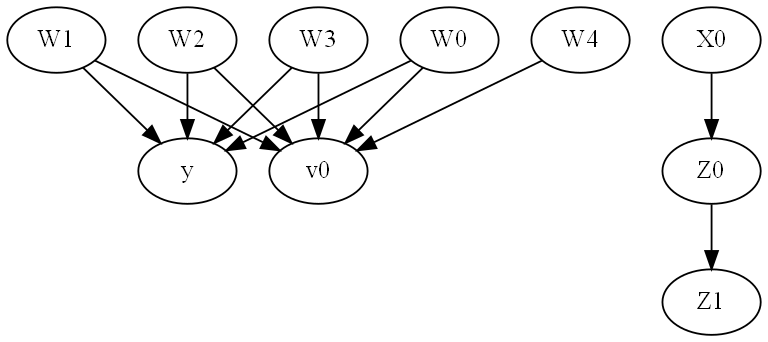

In [14]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [15]:
true_implications, false_implications = model.refute_graph(1,method_name = "partial_correlation")

For the input graph following are the conditional independences: 
Z0  and  v0  are CI given  ('W0',)
Z0  and  v0  are CI given  ('W2',)
Z0  and  v0  are CI given  ('W4',)
Z0  and  v0  are CI given  ('W1',)
Z0  and  v0  are CI given  ('y',)
Z0  and  v0  are CI given  ('X0',)
Z0  and  v0  are CI given  ('W3',)
Z0  and  v0  are CI given  ('Z1',)
Z0  and  W0  are CI given  ('W2',)
Z0  and  W0  are CI given  ('W4',)
Z0  and  W0  are CI given  ('W1',)
Z0  and  W0  are CI given  ('y',)
Z0  and  W0  are CI given  ('X0',)
Z0  and  W0  are CI given  ('W3',)
Z0  and  W0  are CI given  ('Z1',)
Z0  and  W0  are CI given  ('v0',)
Z0  and  W2  are CI given  ('W4',)
Z0  and  W2  are CI given  ('W1',)
Z0  and  W2  are CI given  ('y',)
Z0  and  W2  are CI given  ('X0',)
Z0  and  W2  are CI given  ('W3',)
Z0  and  W2  are CI given  ('Z1',)
Z0  and  W2  are CI given  ('v0',)
Z0  and  W2  are CI given  ('W0',)
Z0  and  W4  are CI given  ('W1',)
Z0  and  W4  are CI given  ('y',)
Z0  and  W4  are CI given  (

W3  and  Z1  are CI given  ('X0',)
The following implications did not satisfy with the dataset 
Z0  and  v0  given  ('W0',)
Z0  and  v0  given  ('W2',)
Z0  and  v0  given  ('W4',)
Z0  and  v0  given  ('W1',)
Z0  and  v0  given  ('y',)
Z0  and  v0  given  ('X0',)
Z0  and  v0  given  ('W3',)
Z0  and  v0  given  ('Z1',)
Z0  and  W0  given  ('y',)
Z0  and  W0  given  ('v0',)
Z0  and  W2  given  ('y',)
Z0  and  W4  given  ('y',)
Z0  and  W1  given  ('y',)
Z0  and  y  given  ('X0',)
Z0  and  y  given  ('W3',)
Z0  and  y  given  ('Z1',)
Z0  and  y  given  ('v0',)
Z0  and  y  given  ('W0',)
Z0  and  y  given  ('W2',)
Z0  and  y  given  ('W4',)
Z0  and  y  given  ('W1',)
Z0  and  W3  given  ('v0',)
Z0  and  W3  given  ('y',)
v0  and  X0  given  ('y',)
v0  and  Z1  given  ('Z0',)
v0  and  Z1  given  ('W0',)
v0  and  Z1  given  ('W2',)
v0  and  Z1  given  ('W4',)
v0  and  Z1  given  ('W1',)
v0  and  Z1  given  ('y',)
v0  and  Z1  given  ('X0',)
v0  and  Z1  given  ('W3',)
W0  and  W4  given  ('y'

In [16]:
print(false_implications)

[['Z0', 'v0', ('W0',)], ['Z0', 'v0', ('W2',)], ['Z0', 'v0', ('W4',)], ['Z0', 'v0', ('W1',)], ['Z0', 'v0', ('y',)], ['Z0', 'v0', ('X0',)], ['Z0', 'v0', ('W3',)], ['Z0', 'v0', ('Z1',)], ['Z0', 'W0', ('y',)], ['Z0', 'W0', ('v0',)], ['Z0', 'W2', ('y',)], ['Z0', 'W4', ('y',)], ['Z0', 'W1', ('y',)], ['Z0', 'y', ('X0',)], ['Z0', 'y', ('W3',)], ['Z0', 'y', ('Z1',)], ['Z0', 'y', ('v0',)], ['Z0', 'y', ('W0',)], ['Z0', 'y', ('W2',)], ['Z0', 'y', ('W4',)], ['Z0', 'y', ('W1',)], ['Z0', 'W3', ('v0',)], ['Z0', 'W3', ('y',)], ['v0', 'X0', ('y',)], ['v0', 'Z1', ('Z0',)], ['v0', 'Z1', ('W0',)], ['v0', 'Z1', ('W2',)], ['v0', 'Z1', ('W4',)], ['v0', 'Z1', ('W1',)], ['v0', 'Z1', ('y',)], ['v0', 'Z1', ('X0',)], ['v0', 'Z1', ('W3',)], ['W0', 'W4', ('y',)], ['W0', 'X0', ('y',)], ['W0', 'Z1', ('v0',)], ['W0', 'Z1', ('y',)], ['W2', 'W4', ('y',)], ['W2', 'X0', ('y',)], ['W4', 'W1', ('y',)], ['W4', 'y', ('Z0',)], ['W4', 'y', ('W0',)], ['W4', 'y', ('X0',)], ['W4', 'y', ('W3',)], ['W4', 'y', ('W2',)], ['W4', 'y', ('

We can see that since we input the wrong graph, many conditional independences were not met

In [17]:
print(true_implications)

[['Z0', 'W0', ('W2',)], ['Z0', 'W0', ('W4',)], ['Z0', 'W0', ('W1',)], ['Z0', 'W0', ('X0',)], ['Z0', 'W0', ('W3',)], ['Z0', 'W0', ('Z1',)], ['Z0', 'W2', ('W4',)], ['Z0', 'W2', ('W1',)], ['Z0', 'W2', ('X0',)], ['Z0', 'W2', ('W3',)], ['Z0', 'W2', ('Z1',)], ['Z0', 'W2', ('v0',)], ['Z0', 'W2', ('W0',)], ['Z0', 'W4', ('W1',)], ['Z0', 'W4', ('X0',)], ['Z0', 'W4', ('W3',)], ['Z0', 'W4', ('Z1',)], ['Z0', 'W4', ('v0',)], ['Z0', 'W4', ('W0',)], ['Z0', 'W4', ('W2',)], ['Z0', 'W1', ('X0',)], ['Z0', 'W1', ('W3',)], ['Z0', 'W1', ('Z1',)], ['Z0', 'W1', ('v0',)], ['Z0', 'W1', ('W0',)], ['Z0', 'W1', ('W2',)], ['Z0', 'W1', ('W4',)], ['Z0', 'W3', ('Z1',)], ['Z0', 'W3', ('W0',)], ['Z0', 'W3', ('W2',)], ['Z0', 'W3', ('W4',)], ['Z0', 'W3', ('W1',)], ['Z0', 'W3', ('X0',)], ['v0', 'X0', ('W3',)], ['v0', 'X0', ('Z0',)], ['v0', 'X0', ('Z1',)], ['v0', 'X0', ('W0',)], ['v0', 'X0', ('W2',)], ['v0', 'X0', ('W4',)], ['v0', 'X0', ('W1',)], ['W0', 'W2', ('Z0',)], ['W0', 'W2', ('W4',)], ['W0', 'W2', ('W1',)], ['W0', 'W2